## Imports

In [1]:
import pandas as pd

import numpy as np

import sklearn

import matplotlib.pyplot as plt
%matplotlib inline


## Loading Data

In [2]:
data_path = "data/JobPerformance.csv"

df = pd.read_csv(data_path)

display(df.head())

,PsychTest1,PsychTest2,YrsEdu,IQ,HrsTrn,HrsWrk,ClientSat,SuperSat,ProjCompl
0,62,78,5,97,6,33,84,59,34
1,46,27,2,93,7,54,55,38,56
2,68,75,2,96,5,47,70,68,38
3,55,56,4,103,7,80,63,81,78
4,51,32,4,98,5,53,55,39,56


## Performing CCA

In [3]:
from sklearn.cross_decomposition import CCA

x_labels = ['PsychTest1', 'PsychTest2', 'YrsEdu', 'IQ', 'HrsTrn', 'HrsWrk']
y_labels = ['ClientSat', 'SuperSat', 'ProjCompl']

X = df[x_labels]
Y = df[y_labels]

cca = CCA(n_components=2)

cca = cca.fit(X, Y)

## Plotting

R^2 0.6085119041665387


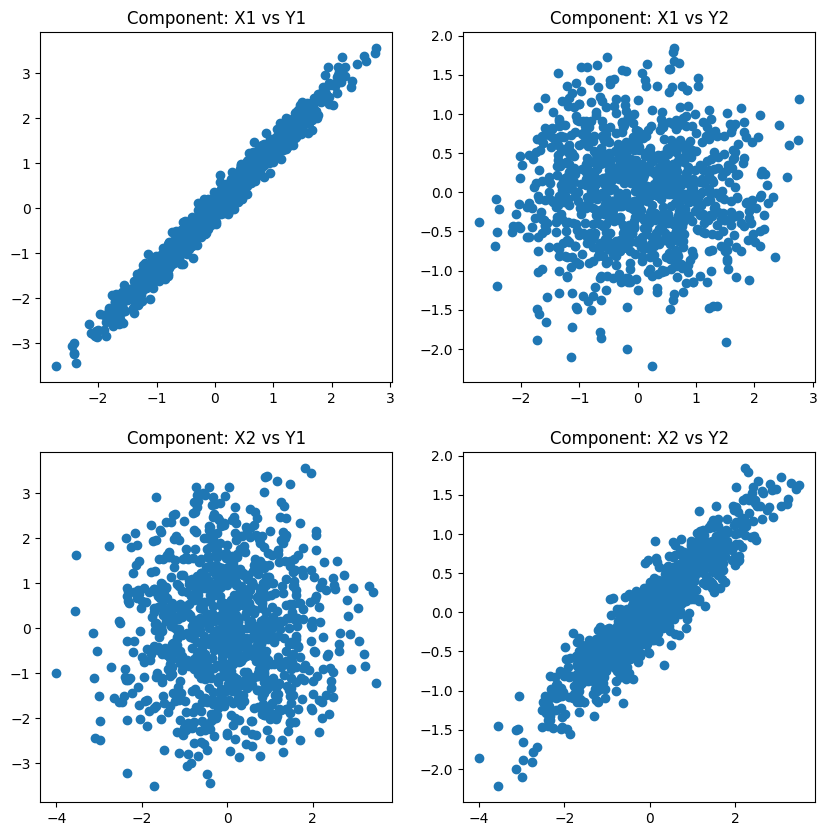

In [27]:
X_c, Y_c = cca.transform(X, Y)

print(f"R^2 {cca.score(X, Y)}")

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].scatter(X_c[:, 0], Y_c[:, 0])
ax[0,0].set_title('Component: X1 vs Y1')

ax[0,1].scatter(X_c[:, 0], Y_c[:, 1])
ax[0,1].set_title('Component: X1 vs Y2')

ax[1,0].scatter(X_c[:, 1], Y_c[:, 0])
ax[1,0].set_title('Component: X2 vs Y1')

ax[1,1].scatter(X_c[:, 1], Y_c[:, 1])
ax[1,1].set_title('Component: X2 vs Y2')
plt.show()

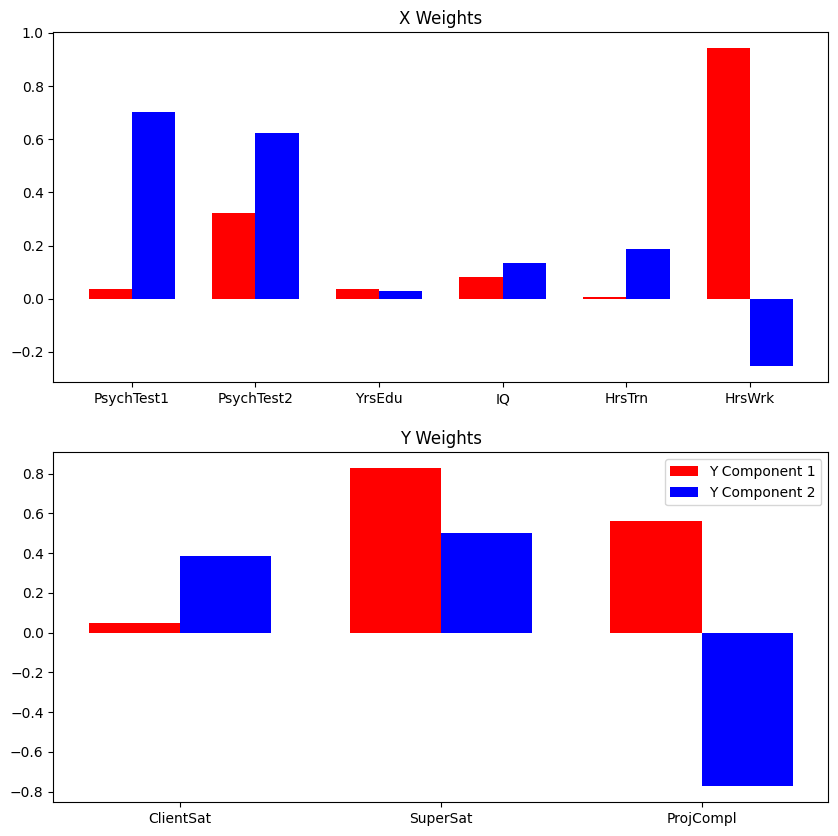

In [4]:
x_weights = cca.x_weights_
y_weights = cca.y_weights_

fig, ax = plt.subplots(2, 1, figsize=(10,10))

width = 0.35
weight_x = np.arange(1,7)
weight_y = np.arange(0,3)

ax[0].bar(weight_x, x_weights[:, 0], width, label='X Component 1', color='r', align='edge')
ax[0].bar(weight_x+width, x_weights[:, 1], width, label='X Component 2', color='b', align='edge')
ax[0].set_xticks(weight_x + width)
ax[0].set_xticklabels(x_labels)
ax[0].set_title('X Weights')

ax[1].bar(weight_y, y_weights[:, 0], width, label='Y Component 1', color='r', align='edge')
ax[1].bar(weight_y + width, y_weights[:, 1], width, label='Y Component 2', color='b', align='edge')
ax[1].set_xticks(weight_y + width)
ax[1].set_xticklabels(y_labels)
ax[1].set_title('Y Weights')


plt.legend()
plt.show()